In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('stud_data.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df1=df.copy()

df1['average'] =( (df['math_score'] + df['reading_score'] + df['writing_score'])/3 ).round(0)
df1.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


In [5]:
features = list( df1.columns ) 
# features.remove('average') 
# features.remove('math_score') 
features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score',
 'average']

In [6]:
# Encoding Categorical Features

encoded_df = pd.get_dummies(df1[features])
list(encoded_df.columns)
#encoded_df.shape

['math_score',
 'reading_score',
 'writing_score',
 'average',
 'gender_female',
 'gender_male',
 'race_ethnicity_group A',
 'race_ethnicity_group B',
 'race_ethnicity_group C',
 'race_ethnicity_group D',
 'race_ethnicity_group E',
 "parental_level_of_education_associate's degree",
 "parental_level_of_education_bachelor's degree",
 'parental_level_of_education_high school',
 "parental_level_of_education_master's degree",
 'parental_level_of_education_some college',
 'parental_level_of_education_some high school',
 'lunch_free/reduced',
 'lunch_standard',
 'test_preparation_course_completed',
 'test_preparation_course_none']

In [7]:
encoded_df.head()

,math_score,reading_score,writing_score,average,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,...,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,72,72,74,73.0,True,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,True
1,69,90,88,82.0,True,False,False,False,True,False,...,False,False,False,False,True,False,False,True,True,False
2,90,95,93,93.0,True,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,True
3,47,57,44,49.0,False,True,True,False,False,False,...,True,False,False,False,False,False,True,False,False,True
4,76,78,75,76.0,False,True,False,False,True,False,...,False,False,False,False,True,False,False,True,False,True


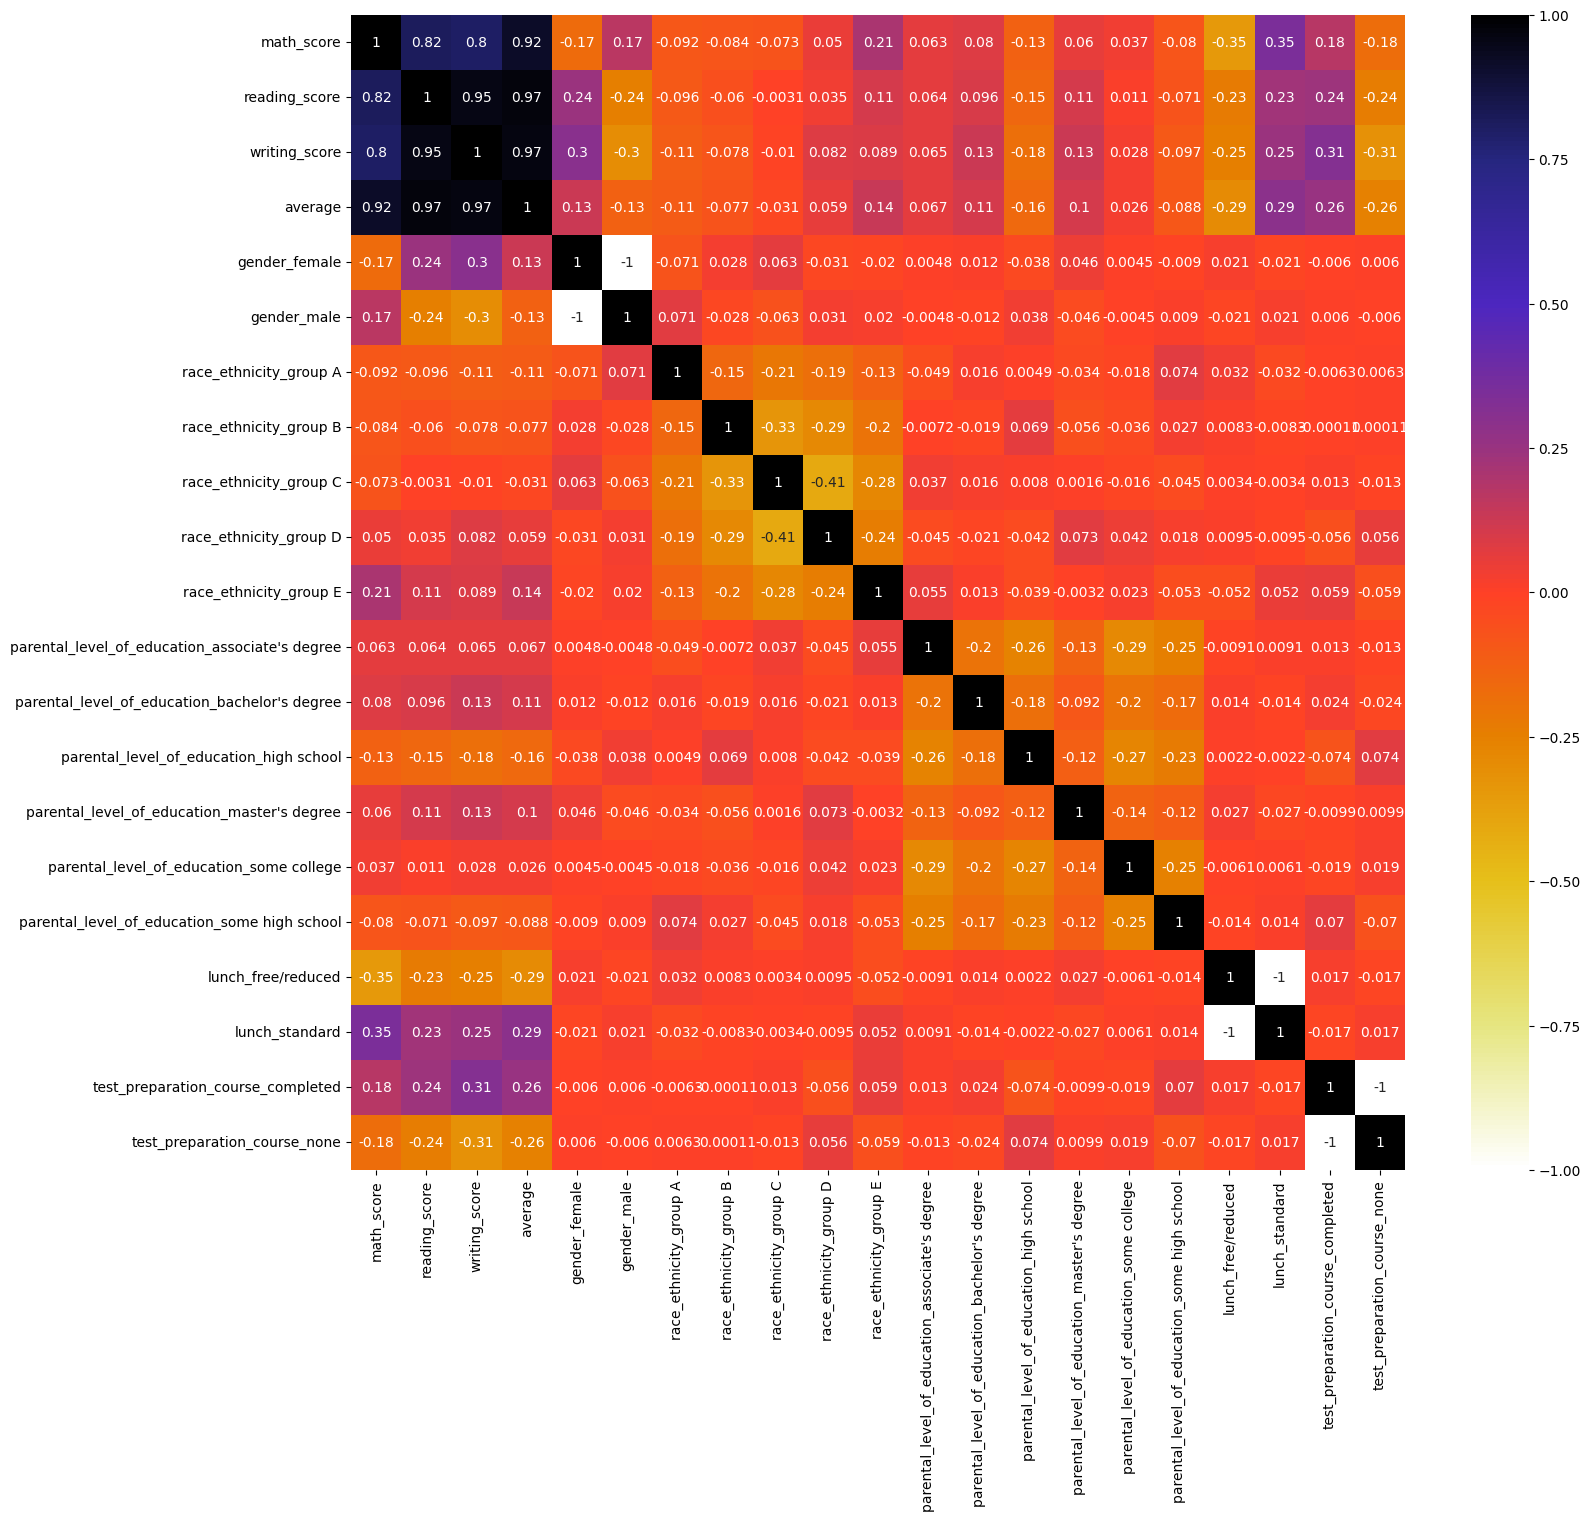

In [8]:
import seaborn as sns

plt.figure(figsize=(17,15))
cor = encoded_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [9]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [10]:
corr_features = correlation(encoded_df, 0.8)
len(set(corr_features))

3

In [11]:
corr_features

{'average', 'reading_score', 'writing_score'}

In [12]:
X = encoded_df
X= X.drop(['average','writing_score','reading_score'],axis=1)
# Y = df1.average
Y = encoded_df.average

In [13]:
X

,math_score,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,72,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True
1,69,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False
2,90,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True
3,47,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True
4,76,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False
996,62,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True
997,59,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False
998,68,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,True,False


In [14]:
Y

0      73.0
1      82.0
2      93.0
3      49.0
4      76.0
       ... 
995    94.0
996    57.0
997    65.0
998    74.0
999    83.0
Name: average, Length: 1000, dtype: float64

In [15]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
X_train.shape, X_test.shape

((700, 18), (300, 18))

In [16]:
#Linear Regression
from sklearn.linear_model import LinearRegression
l1=LinearRegression()
l1.get_params()
l1.fit(X_train,Y_train)
print(l1.intercept_)
print(l1.coef_)

7.994591947410285
[ 0.90981575  4.05300629 -4.05300629  0.20310954  0.18476639  0.66537645
  0.86437692 -1.9176293   0.10605143  0.73833057 -0.71990538  0.95277536
 -0.59880623 -0.47844575  0.61294454 -0.61294454  1.16684552 -1.16684552]


In [17]:
predictions=l1.predict(X_test) 
pred_df=pd.DataFrame(Y_test) ### Creating DataFrame of Y_test(Price)and predictions(price)
pred_df['Predictons']=predictions   
pred_df

,average,Predictons
521,87.0,93.832469
737,64.0,61.633583
740,75.0,76.549763
660,75.0,70.780620
411,82.0,78.403574
...,...,...
468,83.0,83.366405
935,64.0,67.340358
428,59.0,62.250372
7,41.0,39.366275


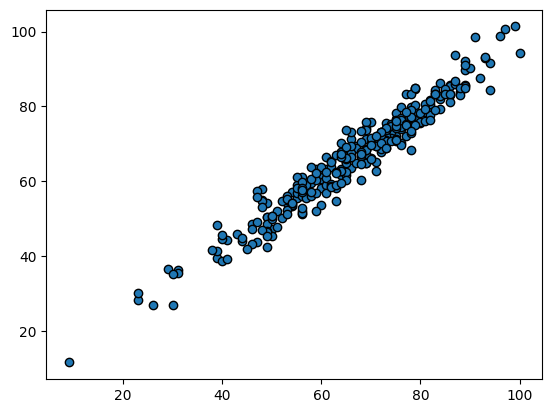

In [18]:
plt.scatter(Y_test,predictions,edgecolors='black')
plt.show()

In [19]:
from sklearn.metrics import r2_score
r2_score(Y_test,predictions)*100

94.4168543374499

In [20]:
from sklearn.model_selection import train_test_split
P_train,P_test,Q_train,Q_test = train_test_split(X, Y,test_size = 0.3,random_state = 42)

In [21]:
### Building Decision Tree Classifier

from sklearn import tree
tree_clf=tree.DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=4)
tree_clf.fit(P_train,Q_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [22]:
encoded_df.head()

,math_score,reading_score,writing_score,average,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,...,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,72,72,74,73.0,True,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,True
1,69,90,88,82.0,True,False,False,False,True,False,...,False,False,False,False,True,False,False,True,True,False
2,90,95,93,93.0,True,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,True
3,47,57,44,49.0,False,True,True,False,False,False,...,True,False,False,False,False,False,True,False,False,True
4,76,78,75,76.0,False,True,False,False,True,False,...,False,False,False,False,True,False,False,True,False,True


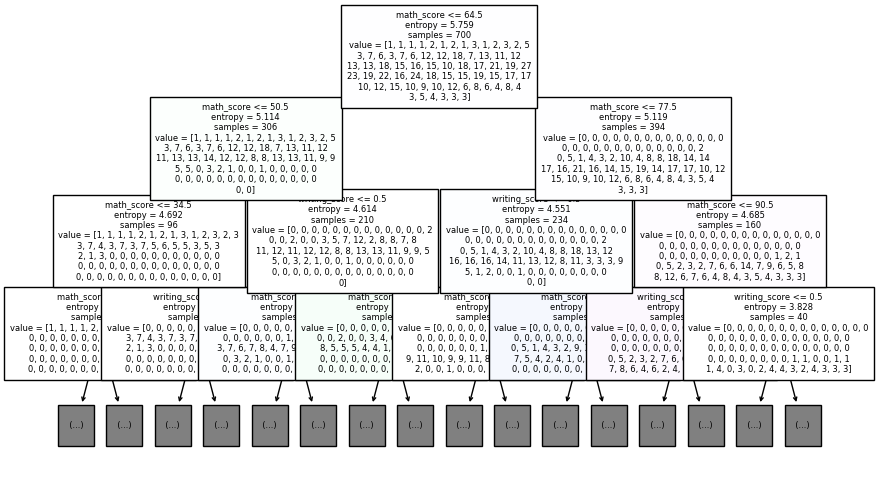

In [23]:
fig,ax=plt.subplots(figsize=(10,6))
tree.plot_tree(tree_clf,ax=ax,feature_names=encoded_df.columns,fontsize=6,filled=True,max_depth=3)
plt.show()

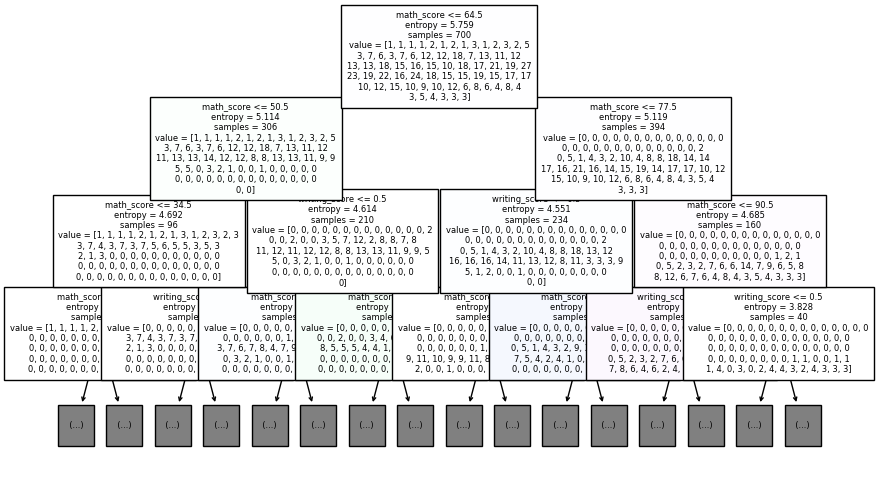

In [24]:
fig,ax=plt.subplots(figsize=(10,6))
tree.plot_tree(tree_clf,ax=ax,feature_names=encoded_df.columns,fontsize=6,filled=True,max_depth=3)
plt.show()

In [25]:
pdt=tree_clf.predict(P_test).round(3)
pdt

array([97., 61., 80., 71., 80., 80., 68., 61., 80., 52., 45., 32., 72.,
       52., 80., 72., 52., 52., 52., 61., 80., 52., 52., 52., 80., 80.,
       68., 52., 32., 52., 58., 68., 58., 71., 80., 52., 71., 72., 83.,
       18., 80., 68., 68., 61., 80., 65., 71., 32., 80., 83., 68., 65.,
       80., 52., 72., 72., 80., 52., 80., 87., 45., 72., 87., 65., 80.,
       72., 61., 58., 65., 87., 68., 87., 52., 52., 58., 71., 87., 52.,
       52., 52., 58., 45., 80., 65., 58., 65., 72., 65., 83., 32., 80.,
       97., 68., 68., 18., 71., 58., 65., 72., 61., 68., 68., 68., 65.,
       68., 68., 52., 71., 72., 52., 32., 72., 52., 52., 83., 58., 45.,
       52., 68., 80., 52., 65., 80., 65., 65., 68., 83., 72., 58., 68.,
       72., 80., 58., 87., 65., 32., 87., 80., 68., 52., 52., 65., 52.,
       45., 80., 52., 52., 71., 45., 83., 83., 65., 58., 68., 87., 72.,
       52., 65., 80., 61., 61., 71., 72., 52., 80., 68., 45., 87., 65.,
       83., 80., 71., 83., 72., 58., 32., 52., 72., 87., 72., 61

In [26]:
print(" Accuracy of the Decision Tree Classifier model is ")
r2_score(Q_test,pdt)*100

 Accuracy of the Decision Tree Classifier model is 


88.29972735320712

In [27]:
# support vector regression


In [28]:
df1

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.0
996,male,group C,high school,free/reduced,none,62,55,55,57.0
997,female,group C,high school,free/reduced,completed,59,71,65,65.0
998,female,group D,some college,standard,completed,68,78,77,74.0


In [29]:
encoded_df = pd.get_dummies(df1[features])
list(encoded_df.columns)

['math_score',
 'reading_score',
 'writing_score',
 'average',
 'gender_female',
 'gender_male',
 'race_ethnicity_group A',
 'race_ethnicity_group B',
 'race_ethnicity_group C',
 'race_ethnicity_group D',
 'race_ethnicity_group E',
 "parental_level_of_education_associate's degree",
 "parental_level_of_education_bachelor's degree",
 'parental_level_of_education_high school',
 "parental_level_of_education_master's degree",
 'parental_level_of_education_some college',
 'parental_level_of_education_some high school',
 'lunch_free/reduced',
 'lunch_standard',
 'test_preparation_course_completed',
 'test_preparation_course_none']

In [30]:
svm=encoded_df*1
svm.head()


,math_score,reading_score,writing_score,average,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,...,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,72,72,74,73.0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,69,90,88,82.0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
2,90,95,93,93.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
3,47,57,44,49.0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,76,78,75,76.0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1


In [31]:
col = "average"
dep=svm.loc[:,svm.columns != col]
dep.head()

,math_score,reading_score,writing_score,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [62]:
ind=svm['average']
ind.head()

0    73.0
1    82.0
2    93.0
3    49.0
4    76.0
Name: average, dtype: float64

In [63]:
ind.dtypes

dtype('float64')

In [64]:
ind=ind.astype(int)

In [65]:
ind.dtypes

dtype('int64')

In [66]:
ind


0      73
1      82
2      93
3      49
4      76
       ..
995    94
996    57
997    65
998    74
999    83
Name: average, Length: 1000, dtype: int64

In [37]:
#from sklearn.model_selection import train_test_split
#dep_train, dep_test, ind_train, ind_test = train_test_split(dep, ind, test_size=0.3,random_state=4)

In [38]:
#dep_train.shape, ind_test.shape

In [46]:
from sklearn.preprocessing import StandardScaler
sc_dep = StandardScaler()
sc_ind = StandardScaler()
dep = sc_dep.fit_transform(dep)

ind = sc_ind.fit_transform(ind)

In [47]:
from sklearn.svm import SVR

In [67]:
regressor = SVR(kernel='rbf')
regressor.fit(dep,ind)

SVR()

In [71]:
ind_pred = regressor.predict

In [72]:
print(ind_pred)

<bound method BaseLibSVM.predict of SVR()>
